Import Packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [2]:
parent_dir = '../../data/ping_pong/'

NMSG = 10_000_000
ITERATIONS = 15
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}5/ping_pong_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}5/ping_pong_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}5/ping_pong_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}5/ping_pong_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

Preview the Data

In [3]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Fri Mar 14 10:21:59 2025 +0100) (507.96ms ela...,1.170,0.0850,0.854,3.63,0.70,33.76,68.95 C,Nominal
1,(Fri Mar 14 10:22:00 2025 +0100) (507.39ms ela...,10.300,0.1490,1.270,13.00,1.39,75.50,68.43 C,Nominal
2,(Fri Mar 14 10:22:00 2025 +0100) (505.22ms ela...,4.750,0.1030,0.970,7.26,1.02,55.62,68.43 C,Nominal
3,(Fri Mar 14 10:22:01 2025 +0100) (507.28ms ela...,0.811,0.0857,0.828,3.21,0.56,29.34,67.90 C,Nominal
4,(Fri Mar 14 10:22:01 2025 +0100) (509.11ms ela...,0.799,0.0620,0.807,3.13,0.57,29.39,67.90 C,Nominal


In [4]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(205, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Fri Mar 14 10:22:11 2025 +0100) (1006.71ms el...,35.5,0.1040,1.320,38.17,3.84,97.75,68.83 C,Nominal
1,(Fri Mar 14 10:22:12 2025 +0100) (1004.24ms el...,33.8,0.0790,0.950,36.48,3.80,98.13,72.45 C,Nominal
2,(Fri Mar 14 10:22:13 2025 +0100) (1004.04ms el...,36.0,0.0529,0.970,38.58,3.83,98.31,75.59 C,Nominal
3,(Fri Mar 14 10:22:14 2025 +0100) (1004.01ms el...,36.2,0.0590,0.869,38.83,3.86,99.14,78.52 C,Nominal
4,(Fri Mar 14 10:22:15 2025 +0100) (1003.89ms el...,35.5,0.0517,1.020,38.16,3.79,98.51,80.94 C,Nominal


In [5]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Fri Mar 14 10:12:52 2025 +0100) (508.79ms ela...,1.01,0.0649,0.805,3.48,0.60,29.71,69.08 C,Nominal
1,(Fri Mar 14 10:12:52 2025 +0100) (507.83ms ela...,11.90,0.0631,1.260,14.49,1.69,76.11,69.08 C,Nominal
2,(Fri Mar 14 10:12:53 2025 +0100) (504.58ms ela...,15.30,0.1480,1.330,19.01,1.85,94.58,69.15 C,Nominal
3,(Fri Mar 14 10:12:53 2025 +0100) (504.92ms ela...,7.70,0.1050,0.952,11.04,1.10,61.12,69.15 C,Nominal
4,(Fri Mar 14 10:12:54 2025 +0100) (505.62ms ela...,2.52,0.0980,1.090,5.16,1.40,59.48,69.11 C,Nominal


In [6]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(117, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Fri Mar 14 10:13:04 2025 +0100) (1008.13ms el...,26.5,0.1160,0.998,30.62,2.72,97.21,72.22 C,Nominal
1,(Fri Mar 14 10:13:05 2025 +0100) (1005.78ms el...,14.1,0.1350,0.778,16.94,1.18,95.88,73.88 C,Nominal
2,(Fri Mar 14 10:13:06 2025 +0100) (1005.85ms el...,15.2,0.0961,0.856,17.82,1.35,96.38,75.19 C,Nominal
3,(Fri Mar 14 10:13:07 2025 +0100) (1005.72ms el...,13.7,0.1020,0.751,16.31,1.13,96.11,76.09 C,Nominal
4,(Fri Mar 14 10:13:08 2025 +0100) (1006.02ms el...,15.8,0.0959,0.842,18.44,1.39,96.33,76.89 C,Nominal


Clean the Data

In [7]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [8]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [9]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-14 10:21:59,1.170,0.0850,0.854,3.63,0.70,33.76,68.95,Nominal,507.96
1,2025-03-14 10:22:00,10.300,0.1490,1.270,13.00,1.39,75.50,68.43,Nominal,507.39
2,2025-03-14 10:22:00,4.750,0.1030,0.970,7.26,1.02,55.62,68.43,Nominal,505.22
3,2025-03-14 10:22:01,0.811,0.0857,0.828,3.21,0.56,29.34,67.90,Nominal,507.28
4,2025-03-14 10:22:01,0.799,0.0620,0.807,3.13,0.57,29.39,67.90,Nominal,509.11


In [10]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(205, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-14 10:22:11,35.5,0.1040,1.320,38.17,3.84,97.75,68.83,Nominal,1006.71
1,2025-03-14 10:22:12,33.8,0.0790,0.950,36.48,3.80,98.13,72.45,Nominal,1004.24
2,2025-03-14 10:22:13,36.0,0.0529,0.970,38.58,3.83,98.31,75.59,Nominal,1004.04
3,2025-03-14 10:22:14,36.2,0.0590,0.869,38.83,3.86,99.14,78.52,Nominal,1004.01
4,2025-03-14 10:22:15,35.5,0.0517,1.020,38.16,3.79,98.51,80.94,Nominal,1003.89


In [11]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-14 10:12:52,1.01,0.0649,0.805,3.48,0.60,29.71,69.08,Nominal,508.79
1,2025-03-14 10:12:52,11.90,0.0631,1.260,14.49,1.69,76.11,69.08,Nominal,507.83
2,2025-03-14 10:12:53,15.30,0.1480,1.330,19.01,1.85,94.58,69.15,Nominal,504.58
3,2025-03-14 10:12:53,7.70,0.1050,0.952,11.04,1.10,61.12,69.15,Nominal,504.92
4,2025-03-14 10:12:54,2.52,0.0980,1.090,5.16,1.40,59.48,69.11,Nominal,505.62


In [12]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(117, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-14 10:13:04,26.5,0.1160,0.998,30.62,2.72,97.21,72.22,Nominal,1008.13
1,2025-03-14 10:13:05,14.1,0.1350,0.778,16.94,1.18,95.88,73.88,Nominal,1005.78
2,2025-03-14 10:13:06,15.2,0.0961,0.856,17.82,1.35,96.38,75.19,Nominal,1005.85
3,2025-03-14 10:13:07,13.7,0.1020,0.751,16.31,1.13,96.11,76.09,Nominal,1005.72
4,2025-03-14 10:13:08,15.8,0.0959,0.842,18.44,1.39,96.33,76.89,Nominal,1006.02


Visualize the Data

In [13]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    
    # idle_df["Elapsed Time (s)"] = (idle_df["Timestamp"] - idle_df["Timestamp"].iloc[0]).dt.total_seconds()
    # bench_df["Elapsed Time (s)"] = (bench_df["Timestamp"] - bench_df["Timestamp"].iloc[0]).dt.total_seconds()

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


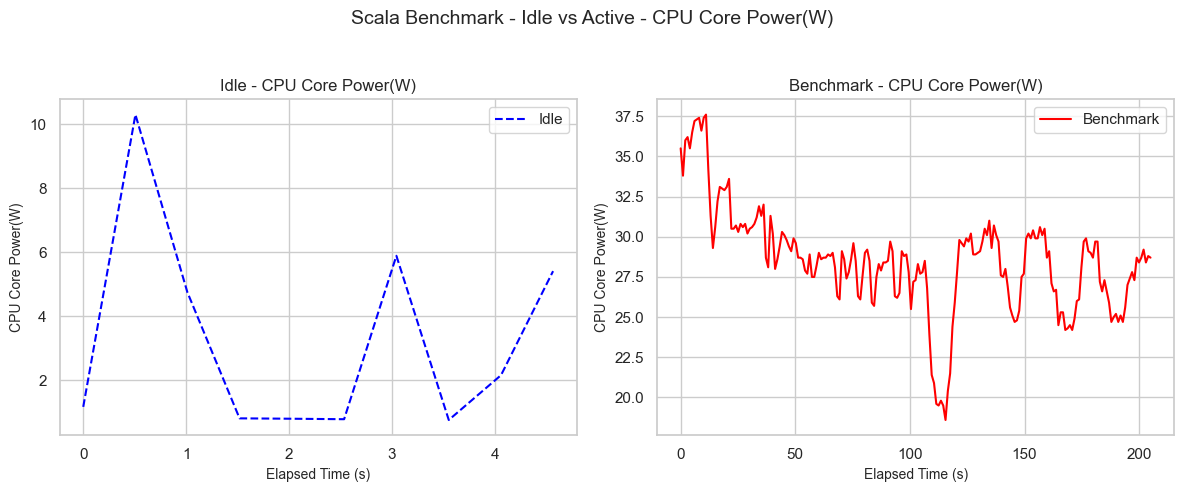

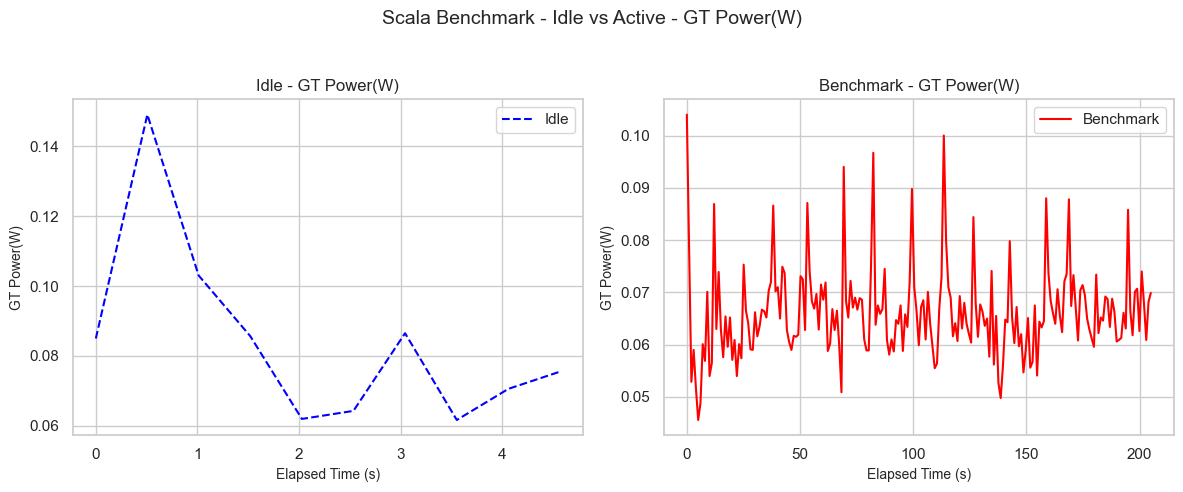

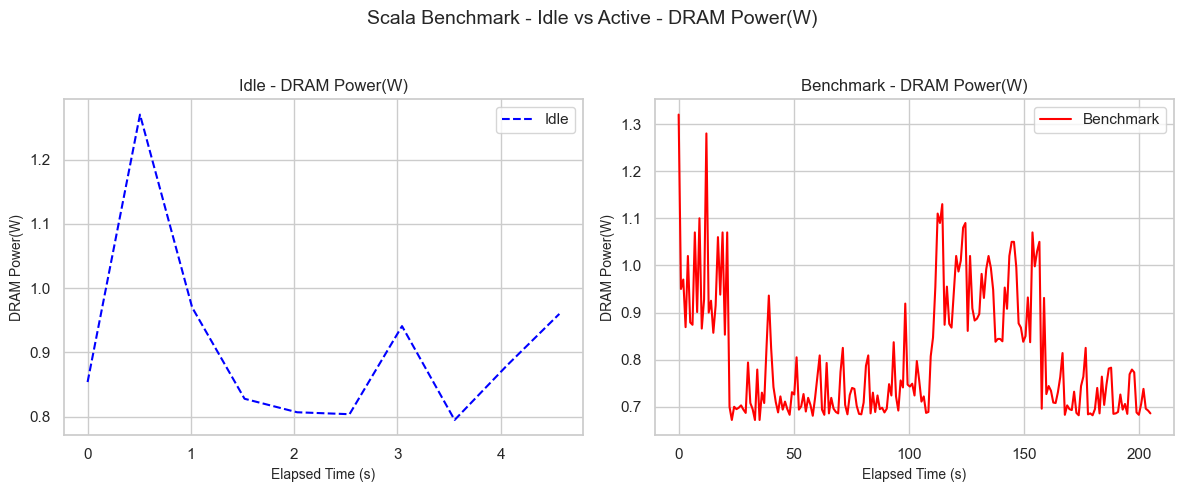

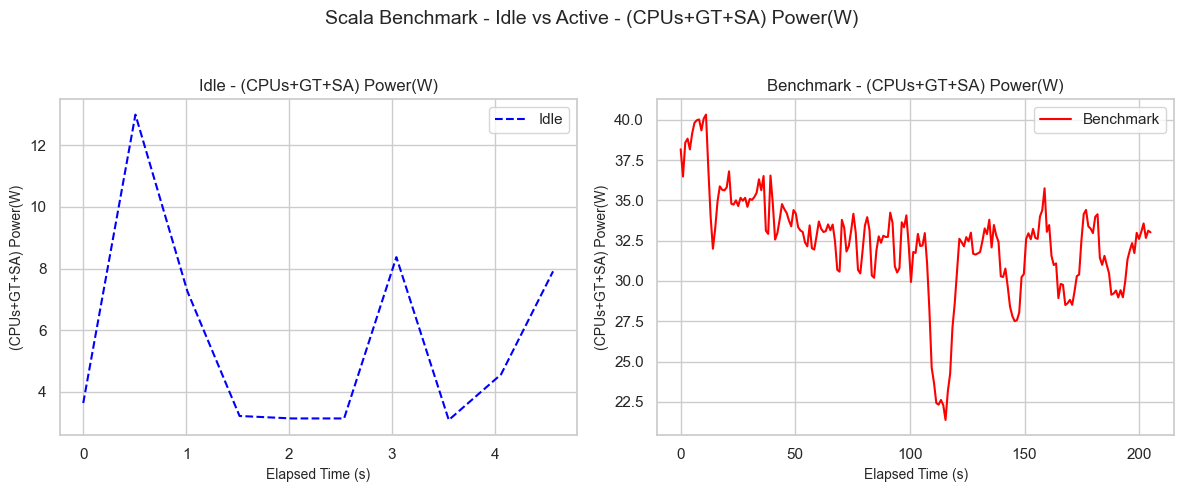

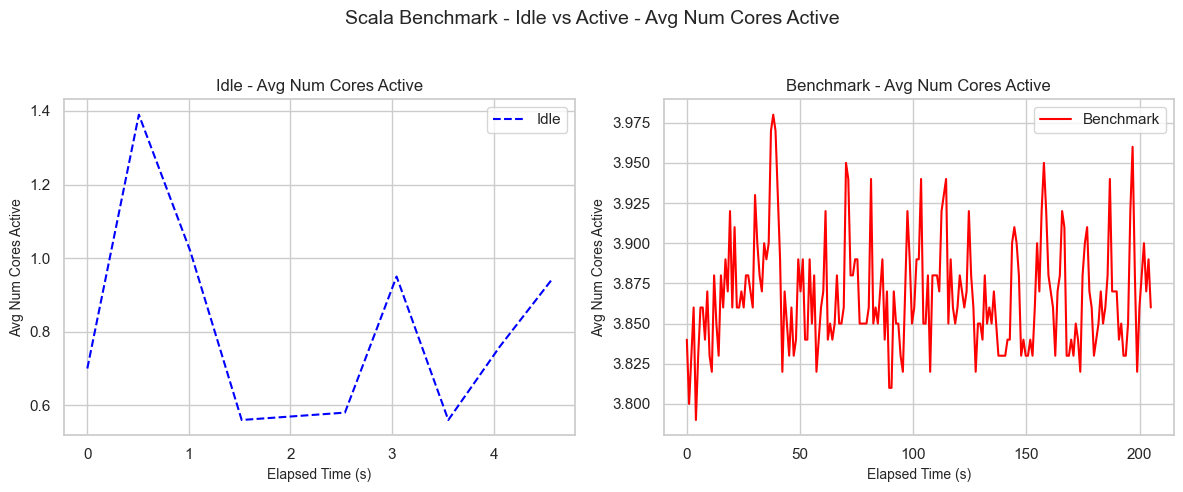

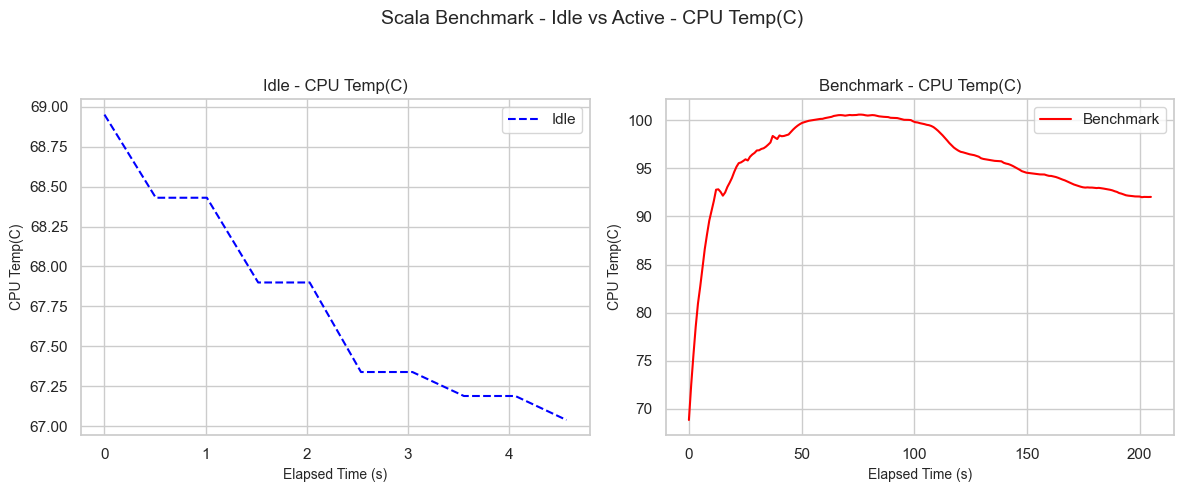

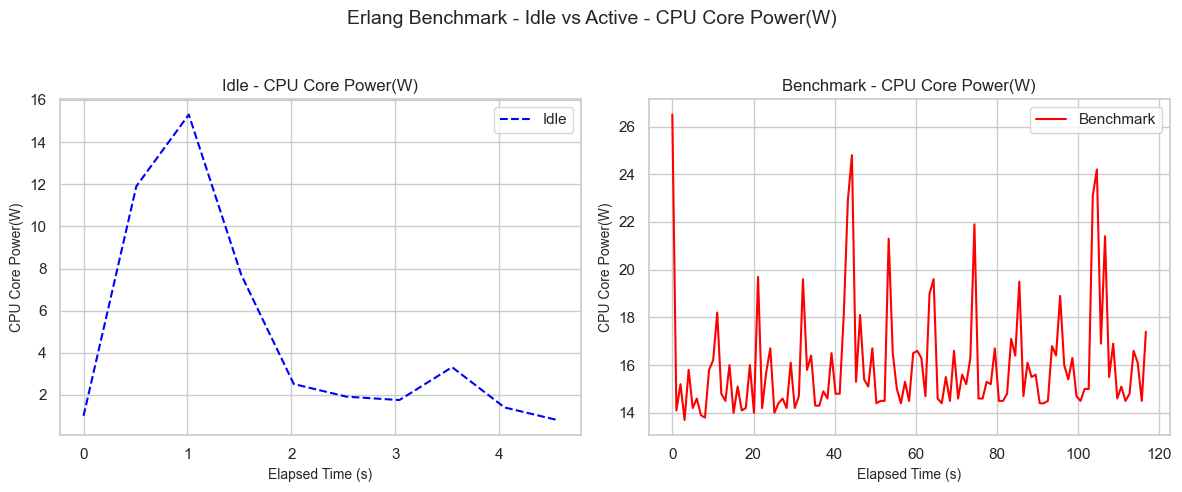

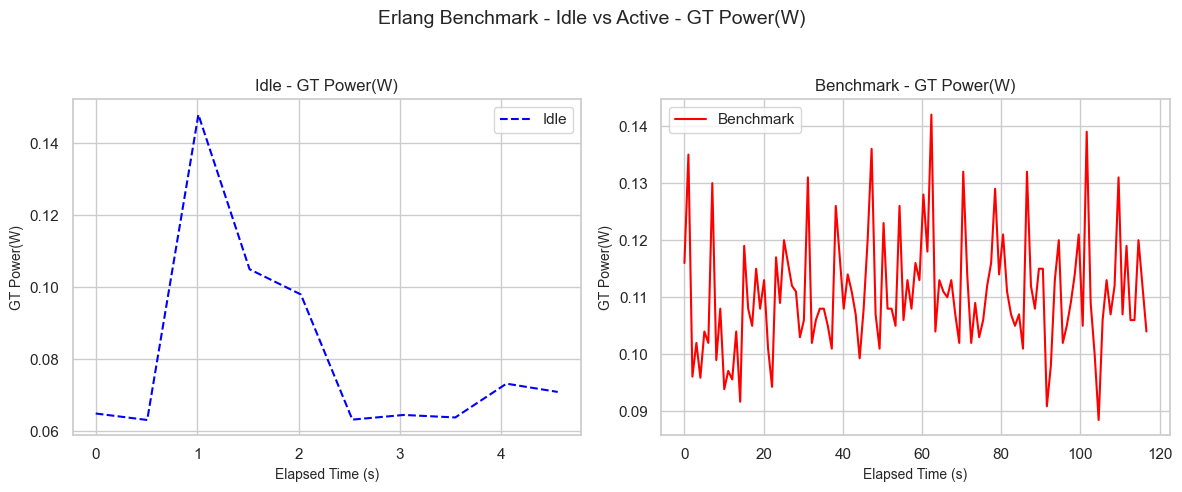

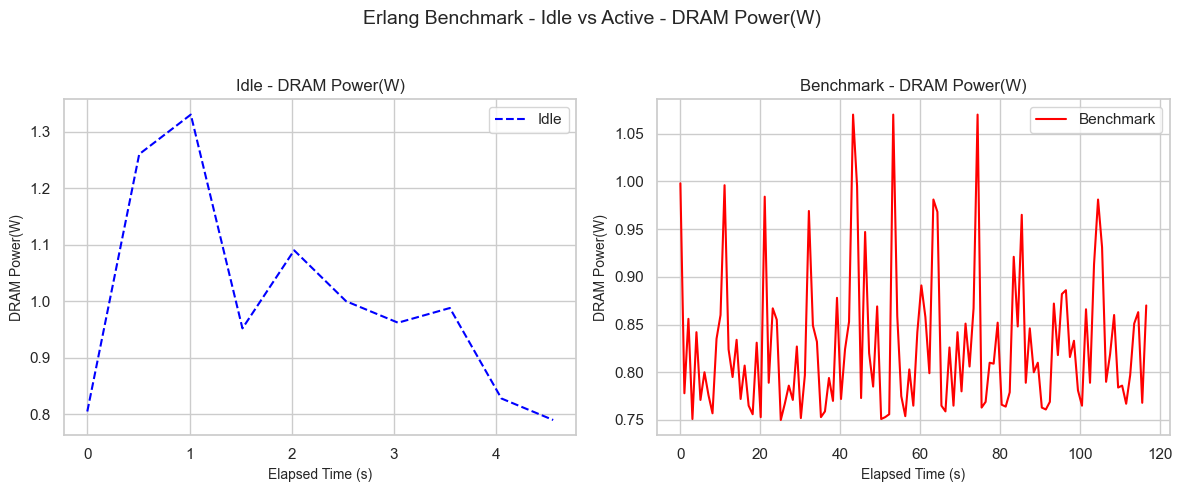

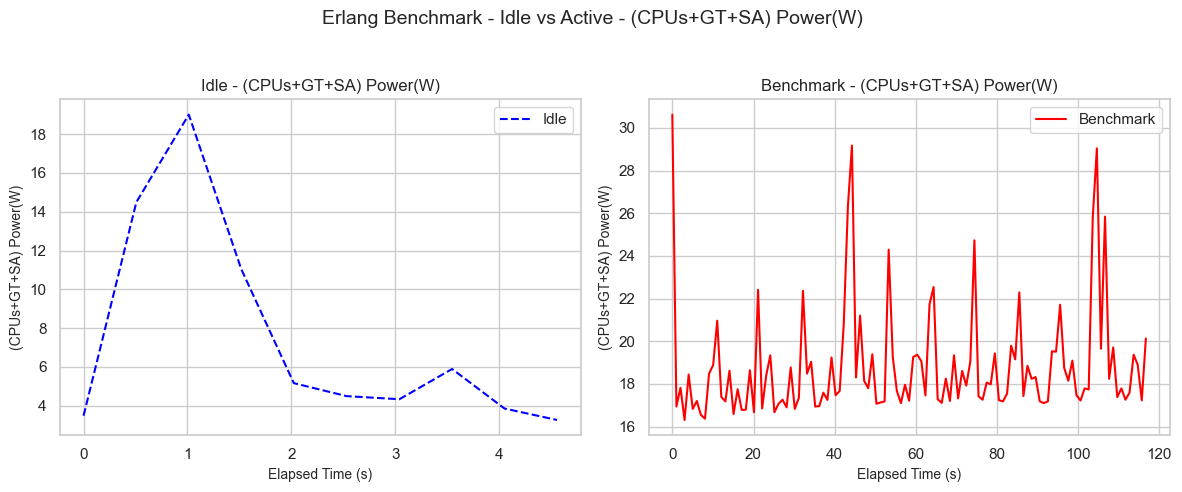

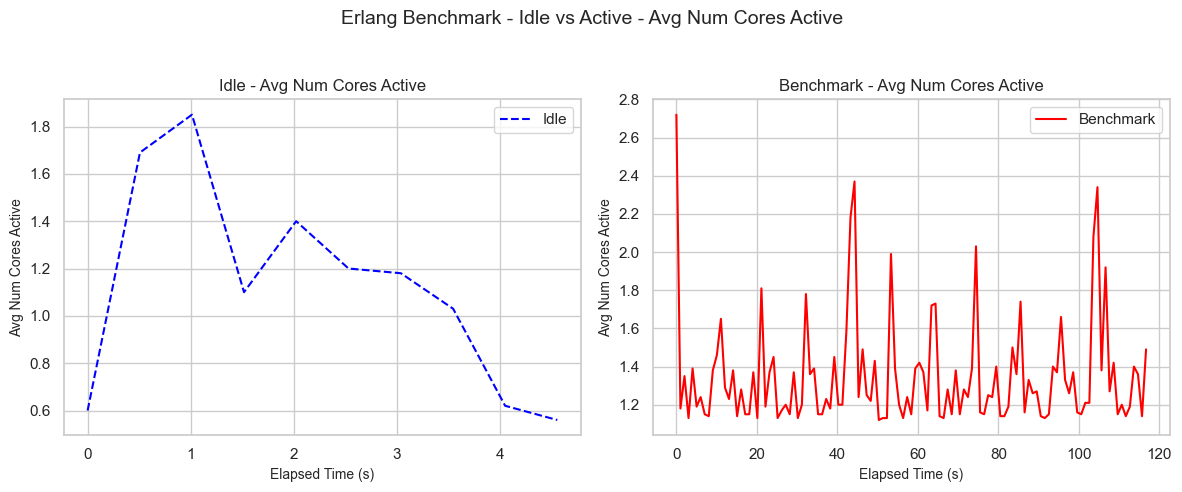

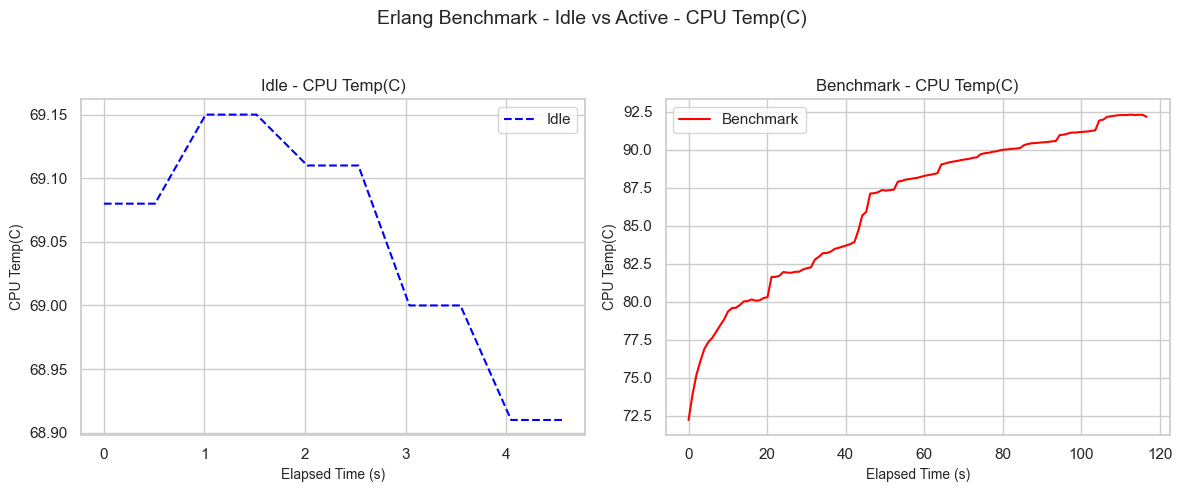

In [14]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [15]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


In [16]:
def format_message_count(nmsg):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if nmsg >= 1_000_000_000:
        return f"{nmsg // 1_000_000_000}B"
    elif nmsg >= 1_000_000:
        return f"{nmsg // 1_000_000}M"
    elif nmsg >= 1_000:
        return f"{nmsg // 1_000}K"
    return str(nmsg)

message_label = format_message_count(NMSG)
title_config_prefix = f"({message_label} Messages, {ITERATIONS} Iterations)"

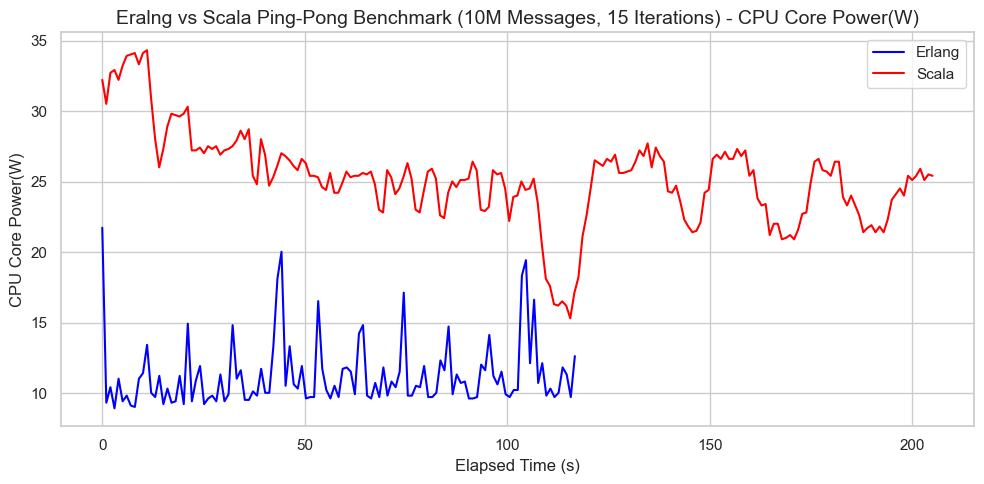

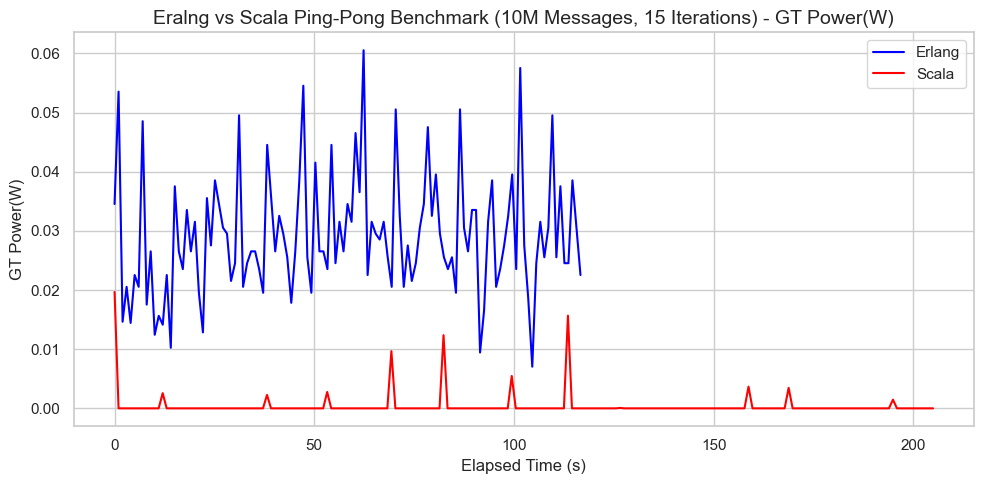

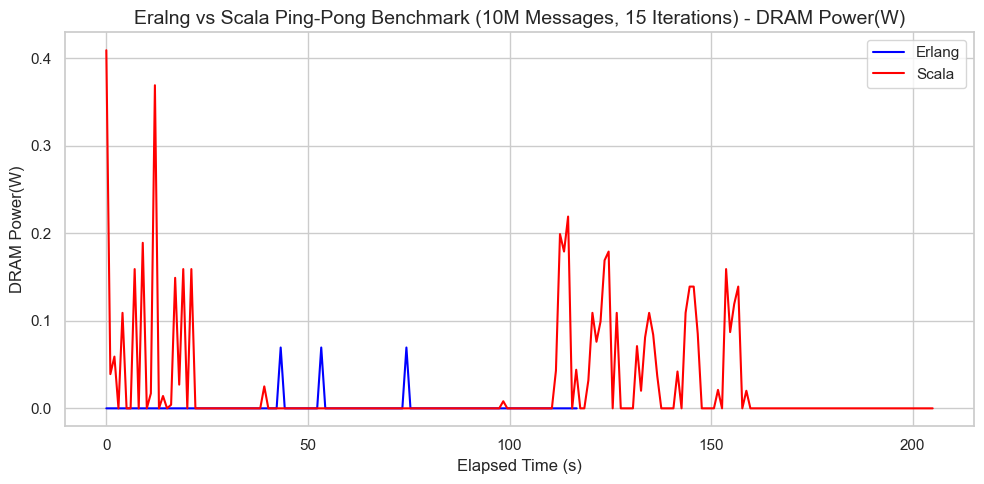

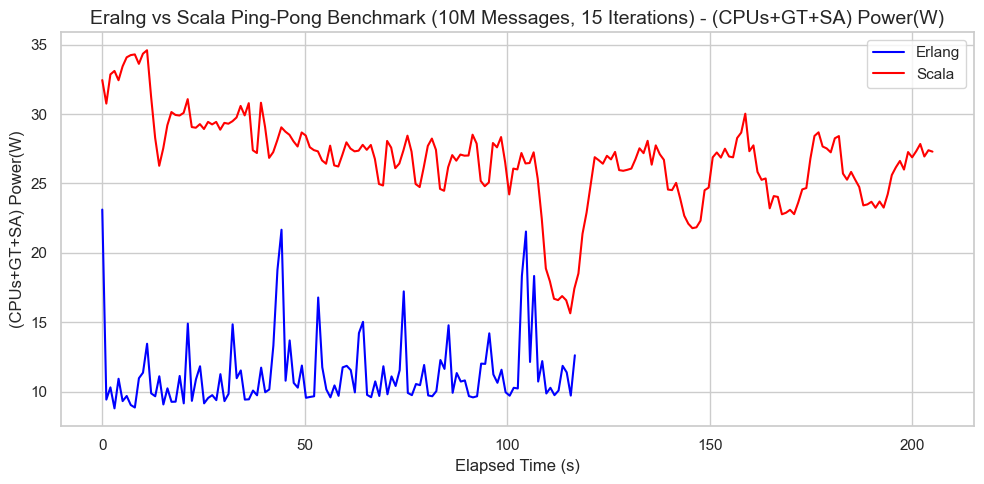

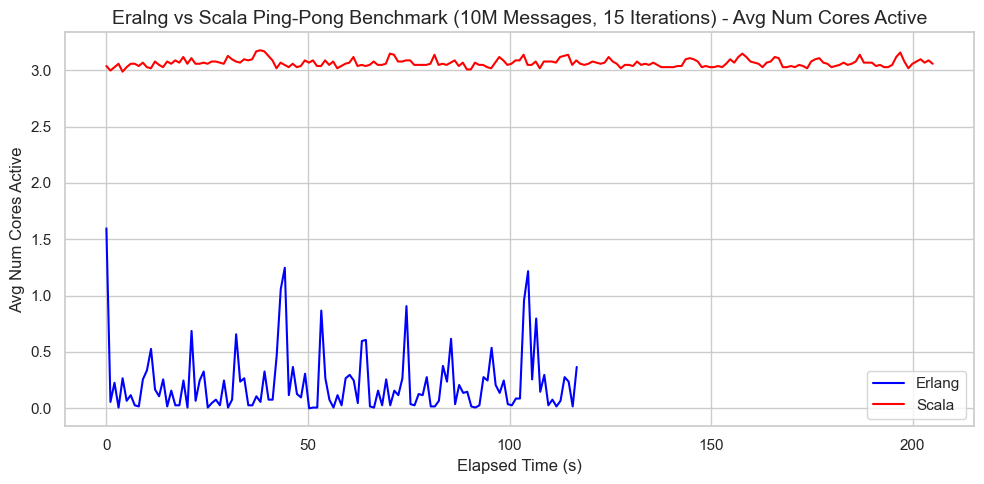

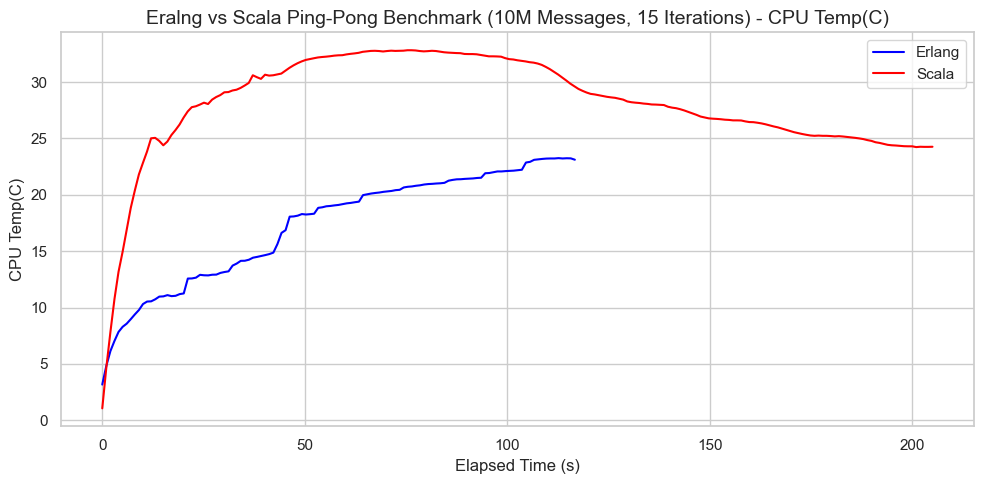

In [17]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Ping-Pong Benchmark {title_config_prefix}")


Compute Average Metrics

In [18]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [19]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Net Average Metrics Comparison:

Scala Benchmark:
CPU Core Power(W)        25.259039
GT Power(W)              -0.018189
DRAM Power(W)            -0.104256
(CPUs+GT+SA) Power(W)    26.681610
CPU Temp(C)              28.028220
Avg Num Cores Active      3.064561
dtype: float64 

Erlang Benchmark:
CPU Core Power(W)        11.276380
GT Power(W)               0.029184
DRAM Power(W)            -0.171081
(CPUs+GT+SA) Power(W)    11.332906
CPU Temp(C)              17.318120
Avg Num Cores Active      0.226487
dtype: float64


Compute Total Energy Consumption

In [20]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time

# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Number of Messages": NMSG,
    "Iterations": ITERATIONS,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["Number of Messages"] == NMSG) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for Number of Messages =", NMSG, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


Results appended to ../../data/ping_pong/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 5495.2915157785355 Joules
Erlang Benchmark: 1333.573532525641 Joules
